In [1]:
from numpy import*
from numpy import max
from matplotlib.pyplot import*

## Problema 1

In [2]:
N = 101
V = 1.0
tol = 1e-6
erro = 10
phi = zeros([N,N],float)
phinew = zeros([N,N],float)

phi[0,:] = V
phinew[0,:] = V

# como p=1, épsilon = 1 e a=1, então simplifiquei a²p/épsilon para 1 

while (abs(erro)>tol):
    for i in range(1,N-1):
        for j in range(1,N-1):
            if(i>20 and i<=40 and j>60 and j<=80):
                phinew[i,j]= 0.25*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1] + 1)
            elif(i>60 and i<=80 and j>20 and j<=40):
                phinew[i,j]= 0.25*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1] - 1)
            else:
                phinew[i,j]= 0.25*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1])
    erro = max(abs(phinew-phi))
    phi = copy(phinew)

<IPython.core.display.Javascript object>


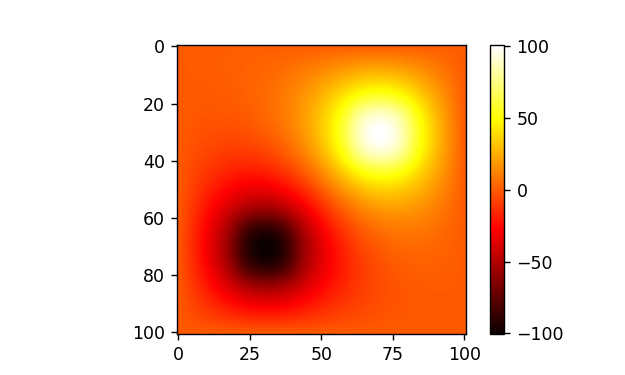

In [3]:
figure(figsize=(5,3))
imshow(phi)
colorbar()
hot()

## Problema 2

In [55]:
N = 101
V = 1.0
tol = 1e-6
erromax = 10
erro = 10
w = 0.9
phi = zeros([N,N],float)
phi[0,:] = V

In [56]:
while (erromax>tol):
    erromax = 0
    for i in range(1,N-1):
        for j in range(1,N-1):
            
            aux = 0.25*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1])
            delta = aux - phi[i, j]
            phi[i,j]= phi[i, j] + (1+w)*delta
            erro = abs(delta)
            
            if(erro>erromax):
                erromax=erro

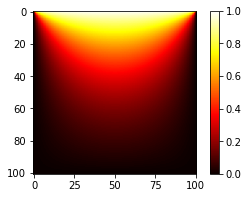

In [57]:
figure(figsize=(5,3))
imshow(phi)
colorbar()
hot()

## Problema 3

In [126]:
N = 101
V = 1.0
tol = 1e-6
a = 0.1
erro = 10
w = 0.9
phi = zeros([N,N],float)
phinew = zeros([N,N],float)

phi[20:80,20] = V
phi[20:80,80] = -V
phinew[20:80,20] = V
phinew[20:80,80] = -V

In [127]:
while (abs(erro)>tol):
    for i in range(1,N-1):
        for j in range(1,N-1):
            phinew[i,j]= 0.25*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1])
    erro = max(abs(phinew-phi))
    phi = copy(phinew)

<IPython.core.display.Javascript object>


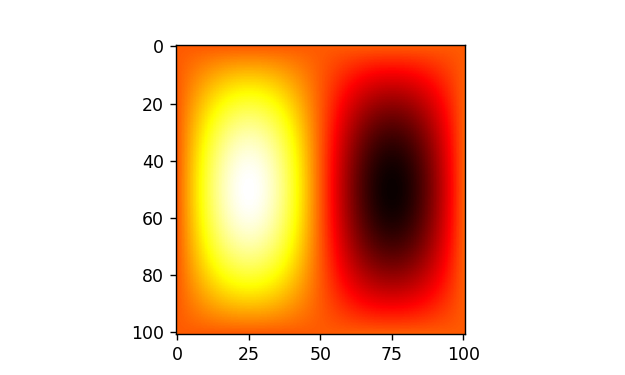

In [128]:
figure(figsize=(5,3))
imshow(phi)

## Problema 4

In [142]:
L = 20
D = 0.1
N = 100
a = L/N
h = 0.1
eps = h/1000

T = 10*ones(N,float)
T[N-1]= 11
Tnovo = copy(T)

x = linspace(0,L,N)
t1, t2, t3, t4 = 3375, 3465, 3555, 3650
t = 0.0

In [143]:
def To(t):
    return 10 + 12*sin(2*pi*t/365)

<IPython.core.display.Javascript object>


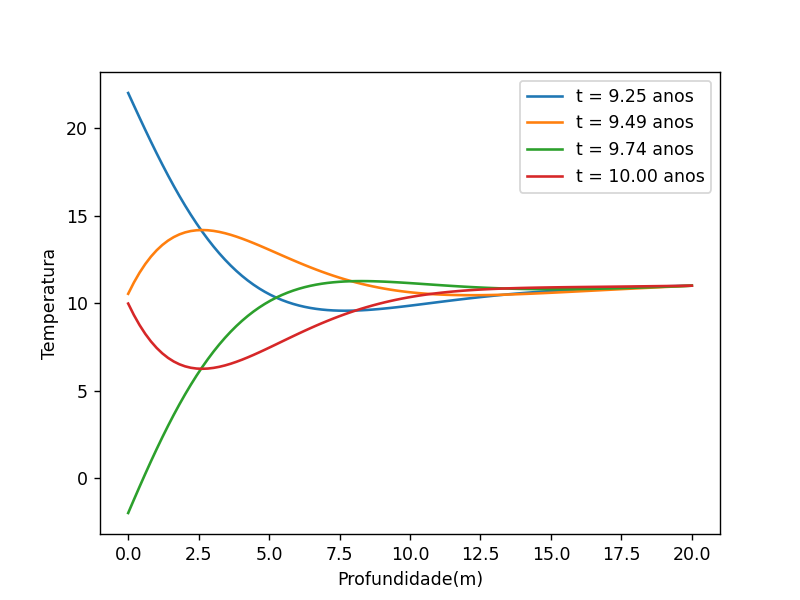

Text(0, 0.5, 'Temperatura')

In [144]:
while (t<(t4+eps)):
    
    Tnovo[0] = To(t)
    for i in range(1,N-1):
        Tnovo[i] = T[i] + (h*D/(a**2))*(T[i-1]+T[i+1]-2*T[i])
    t+=h
    T = copy(Tnovo)
    if (abs(t-t1)<=eps) or abs(t-t2)<=eps or (abs(t-t3)<=eps) or (abs(t-t4)<=eps):
        ty = t/365
        plot(x,T,label="t = %.2f anos" % ty )
        
legend()
xlabel("Profundidade(m)")
ylabel("Temperatura")